<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classifier
This is looking at which hyperparemeters produce higher accuracices and their effect on things such as training time and testing time
Hyperparameters for random forests are things such as:

*   Number of trees in forest (default 100)
*   The number of features for each tree
*   Whether to do sampling with replacement (bootstrap samples) or not
*   The Number of samples required to split a node
*   The Maximum Depth of the trees




# Downgrade tensorflow
This allows us to import and read the MNIST dataset using tensorflow.

In [ ]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 3.2MB 36.0MB/s 
     |████████████████████████████████| 491kB 33.2MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


# Import the requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

# Read the MNIST dataset

In [ ]:
# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

# set-up dataset as numpy array
# seperate the dataset into training (60,000) images & labels and testing (10,000) images & labels
train_images = np.asarray(mnist.train.images)
train_labels = np.asarray(mnist.train.labels)
test_images = np.asarray(mnist.test.images)
test_labels = np.asarray(mnist.test.labels)

# Train

In [ ]:
clf = RandomForestClassifier(
    n_estimators=100, # Number of trees in forest
    max_features='sqrt', # Number of features for each tree 
    bootstrap=True, # Whether to do sampling with replacement (bootstap samples) or not
    min_samples_split=2, # The Number of samples required to split a node
    max_depth=None, # The Maximum Depth of the trees
)

# Train on the entire dataset
print('Train model clf      ',datetime.now().strftime("%H:%M:%S"))
clf.fit(train_images,train_labels)
print('Training complete      ',datetime.now().strftime("%H:%M:%S"))

Train model clf       14:02:35
Training complete       14:03:09


# Predict

In [ ]:
# Test on 10000 images:
test_x = test_images[:10000]
expected = test_labels[:10000].tolist()

start_test_time = datetime.now()
predicted = clf.predict(test_x)
end_test_time = datetime.now()

print("Accuracy: ", accuracy_score(expected, predicted))
print("Testing time:", end_test_time-start_test_time)

# see how the model performed on each digit
print("Classification Report: ")
classification_report(expected, predicted)
print("Confusion Matrix: ")
confusion_matrix(expected, predicted)

Accuracy:  0.9679
Testing time: 0:00:00.356334
Classification Report: 
Confusion Matrix: 


array([[ 971,    0,    0,    0,    0,    1,    3,    1,    3,    1],
       [   0, 1124,    2,    2,    0,    1,    4,    1,    1,    0],
       [   6,    0,  998,    6,    2,    0,    4,    9,    7,    0],
       [   1,    0,   11,  974,    0,    8,    0,    9,    5,    2],
       [   1,    0,    2,    0,  950,    0,    4,    0,    3,   22],
       [   2,    0,    0,   16,    2,  857,    6,    2,    5,    2],
       [   5,    3,    1,    0,    4,    5,  936,    0,    4,    0],
       [   1,    2,   20,    3,    3,    0,    0,  986,    3,   10],
       [   3,    0,    5,    8,    5,    4,    6,    3,  927,   13],
       [   7,    6,    2,   11,   14,    4,    1,    4,    4,  956]])

# Prediction example
Set image_index equal to any value between 1 and 10,000 i.e. the test dataset.

9


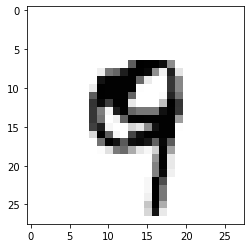

In [ ]:
# select image index from test dataset
image_index = 4444

# reshape the test image so that it fits on screen
# make colourmap greyscale
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

# make a prediction on the image using the classifier defined and trained above
# (1,-1) means we are using a single sample
pred = clf.predict(test_x[image_index].reshape(1,-1))[0]

# print the classifier's prediction
print(pred)